# Data Wrangling and EDA: Image Processing Project

# Overview of Image Classification and Recognition System

Image processing is used for everything from automatically tagging pictures in social media to unlocking our phones. Recent advancements in deep learning have made the accuracy of face recognition better. In this project, I will like to use the Humans dataset to develop a face classification/recognition system that can detect faces in images, identify the faces, and modify faces with digital makeup. I will start by setting up a development environment, and then train machine learning models to analyze images and identify facial landmarks. I will also code the facial feature detection, representing a face as a set of measurements, and encoding faces. Lastly, I will repurpose and adjust any of the existing ML systems I built.

In this project, I will provide my ML system with examples of each image and then develop learning algorithms that look at these examples and learn about the visual appearance of each.

That's why I created a a training dataset of labeled images, later I will feed them to the face recognition system to process the data. Overview of my system pipline will be as follows:

Generate input which the training dataset with N images, each labeled based on race and gender.

I use this training set to train a classifier/ML system to learn what every one of the images looks like.

In the end, I will evaluate the quality of the classifier/ML system by asking it to predict images for a new set of images that it’s never seen before. I’ll then compare the true image to the ones predicted by the ML system.

The dataset was taken from Kaggle(https://www.kaggle.com/ashwingupta3012/human-faces?select=Humans). It has a collection of 7.2k+ images. It has a mix of front face, side profile pictures which will help achieve great identifying results and an improved range of classifier/recognition possibilities.

# Project Deliverables

Detecting faces in images.
Analyzing a histogram of oriented gradients (HOG)
Identifying faces in images.
Locating facial features in images.
Coding for face detection.
Finding lookalikes using face detection.
Generating face encoding automatically.

In [102]:
import os, random, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from skimage import color
from skimage import io, filters, transform, restoration, measure, segmentation, feature
from skimage.transform import rescale, resize, downscale_local_mean
%matplotlib inline
from PIL import Image
import glob
import skimage
import PIL.Image
import PIL.ImageDraw
import face_recognition


# Loading Images

There are two folders with images. one is named train, that's where all the training images are stored. Humans_faces folder is where I will be picking random images to test the system later.

# Count number of images in the human_faces folder

In [103]:
def count_images(dir):
    return len([1 for x in list(os.scandir(dir)) if x.is_file()])

In [104]:
folder_hum_faces = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces'

In [105]:
count_images(folder_hum_faces)

7211

there are 7211 images in the humans_faces folder

# Count number of images in the train folder

Creating variables for the folder containing the train file as folder and filename respectively.

In [106]:
folder = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file'
filename_train = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/train/'

In [107]:
count_images(filename_train)

6

there are 7 images in the train folder

# Lets see what some of the training images look like

Visualize the images in the train folder

In [108]:
filename = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/train/*'

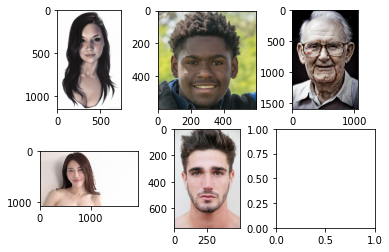

<Figure size 432x288 with 0 Axes>

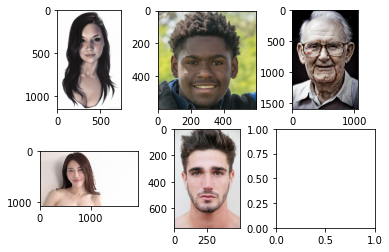

In [109]:
io.use_plugin('matplotlib')
collection = io.imread_collection(filename) #create a collection of all the images in the train folder
plt.figure()
io.imshow_collection(collection) 

I named a folder test, it has a duplicate of some of the images in the train folder in a different format. Let's see what they look like too

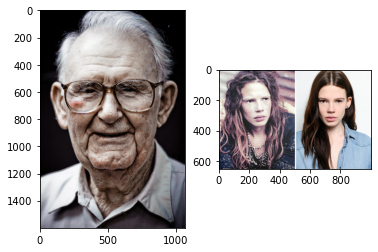

<Figure size 432x288 with 0 Axes>

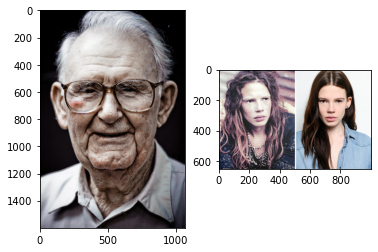

In [110]:
filename = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/test/*'
io.use_plugin('matplotlib')
collection = io.imread_collection(filename) #create a collection of all the images in the train folder
plt.figure()
io.imshow_collection(collection) 

# Resized Images in the new images folder

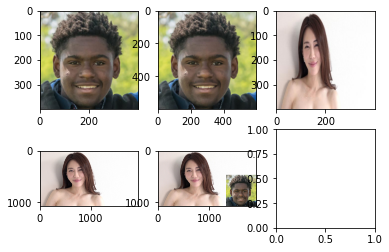

<Figure size 432x288 with 0 Axes>

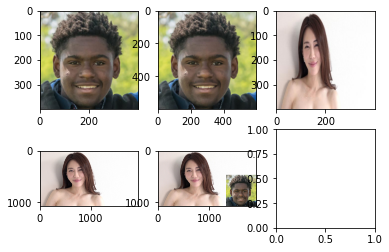

In [111]:
filename = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/new_images/*'
io.use_plugin('matplotlib')
collection = io.imread_collection(filename) #create a collection of all the images in the train folder
plt.figure()
io.imshow_collection(collection) 

# Face Detection

I need to make sure the faces on the image files can be detected.

In [112]:
def show_image(image, title='Image', cmap_type='gray'): 
    plt.figure(figsize=(16, 12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 290, Left: 504, Bottom: 675, Right: 889


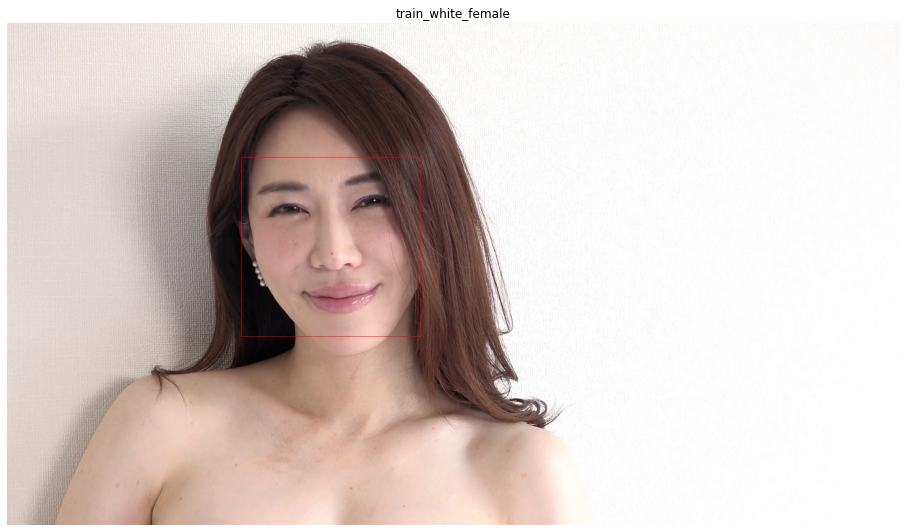

In [113]:
# Load the white female image file into a numpy array
image1 = face_recognition.load_image_file('train/train_wt_f.png')

# Find all the faces in the image

face_locations1 = face_recognition.face_locations(image1)
number_of_faces = len(face_locations1)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image1 = PIL.Image.fromarray(image1)

for face_location in face_locations1:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image1)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
show_image(pil_image1, 'train_white_female')

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 428, Left: 206, Bottom: 1094, Right: 872


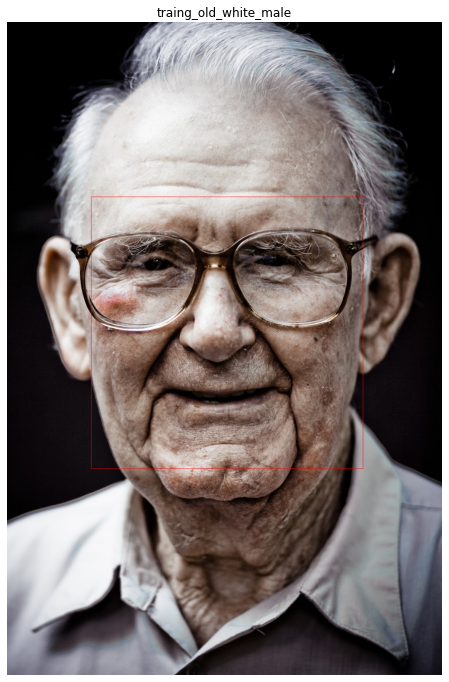

In [114]:

# Load the old white male file into a numpy array
image2 = face_recognition.load_image_file('train/train_old_wt_m.jpeg')

# Find all the faces in the image

face_locations2 = face_recognition.face_locations(image2)
number_of_faces = len(face_locations2)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image2 = PIL.Image.fromarray(image2)

for face_location in face_locations2:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image2)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
show_image(pil_image2, 'traing_old_white_male')

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 241, Left: 134, Bottom: 562, Right: 455


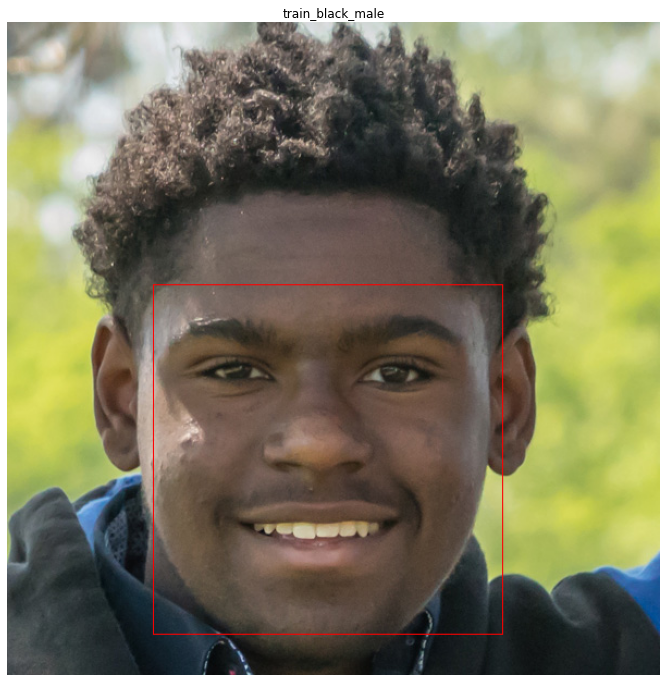

In [115]:

# Load the black male image file into a numpy array
image3 = face_recognition.load_image_file('train/train_bk_m.jpg')

# Find all the faces in the image

face_locations3 = face_recognition.face_locations(image3)
number_of_faces = len(face_locations3)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image3 = PIL.Image.fromarray(image3)

for face_location in face_locations3:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image3)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
show_image(pil_image3, 'train_black_male')

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 247, Left: 204, Bottom: 632, Right: 589


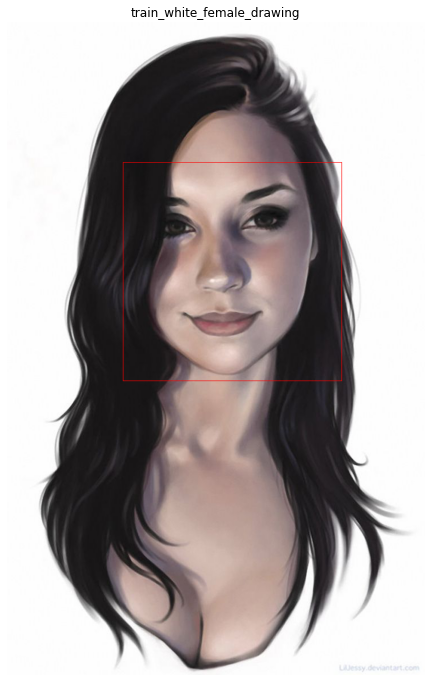

In [116]:

# Load the second white female drawing image file into a numpy array
image4 = face_recognition.load_image_file('train/Train_wt_f2.jpg')

# Find all the faces in the image

face_locations4 = face_recognition.face_locations(image4)
number_of_faces = len(face_locations4)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image4 = PIL.Image.fromarray(image4)

for face_location in face_locations4:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image4)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
show_image(pil_image4, 'train_white_female_drawing')

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 247, Left: 76, Bottom: 632, Right: 461


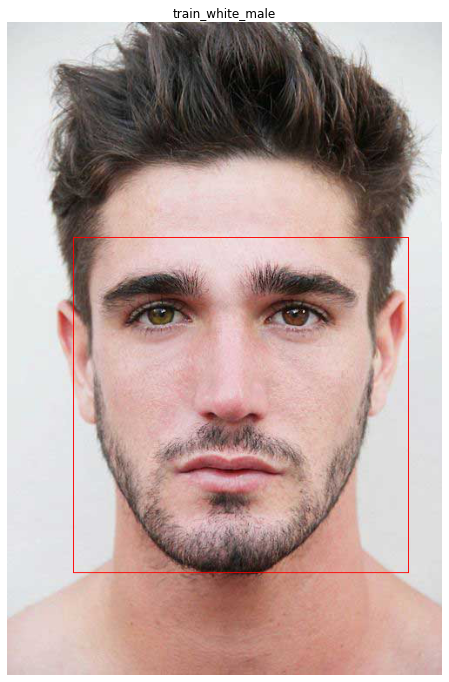

In [117]:

# Load the second white female drawing image file into a numpy array
image5 = face_recognition.load_image_file('train/train_wt_m.jpg')

# Find all the faces in the image

face_locations5 = face_recognition.face_locations(image5)
number_of_faces = len(face_locations5)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image5 = PIL.Image.fromarray(image5)

for face_location in face_locations5:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image5)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
show_image(pil_image5, 'train_white_male')

I want to test the alogrithims on an image with two people to see if it can detect the two images

I found 2 face(s) in this photograph.
A face is located at pixel location Top: 142, Left: 613, Bottom: 365, Right: 835
A face is located at pixel location Top: 142, Left: 142, Bottom: 365, Right: 365


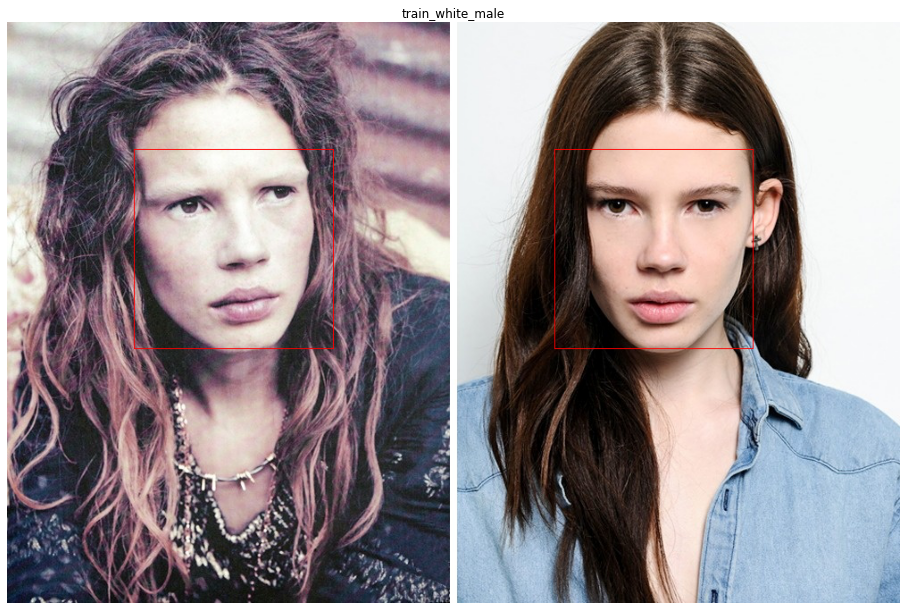

In [118]:

# Load the second white female drawing image file into a numpy array
image6 = face_recognition.load_image_file('test/testing_f.jpg')

# Find all the faces in the image

face_locations6 = face_recognition.face_locations(image6)
number_of_faces = len(face_locations6)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image6 = PIL.Image.fromarray(image6)

for face_location in face_locations6:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image6)
    draw.rectangle([left, top, right, bottom], outline="red")

# Display the image on screen
show_image(pil_image6, 'train_white_male')

I think it works great!

# Face Encodings

Since the algorithm only sees an array of RGB values that matches a pattern from the sample images. It notes information like color, size, gaps, etc and use it to identify a particular face.

In [119]:
# Generate the face encodings
face_encoding6 = face_recognition.face_encodings(image6) #face enconding for the testing image file

if len(face_encoding6) == 0:
    # No faces found in the image.
    print("No faces were found.")

else:
    # Grab the first face encoding
    first_face_encoding = face_encoding6[0]

    # Print the results
    print(first_face_encoding)

[-0.07244479  0.06012543  0.05033303 -0.0587     -0.16760397 -0.06210351
 -0.07502867 -0.11601207  0.15505733 -0.14729592  0.23949176 -0.02211832
 -0.19873911  0.02286546 -0.0491506   0.16690835 -0.15632221 -0.08597635
 -0.0379581  -0.06427754  0.05215818 -0.02250379  0.03126347  0.16805468
 -0.10272947 -0.31540614 -0.10008456 -0.06665285 -0.13618456 -0.14608882
 -0.02726425  0.06723048 -0.11371482  0.0133896  -0.04245133  0.10285366
 -0.14738923 -0.09277482  0.16275074 -0.01137144 -0.2185711   0.02902422
 -0.01048543  0.26818293  0.25384691 -0.02658524  0.035714   -0.06222452
  0.16989121 -0.21006206  0.03616104  0.16310884  0.0213505   0.06178722
  0.0481793  -0.12784027  0.01662732  0.23547694 -0.21463235 -0.05691488
  0.01243289 -0.10598604  0.03572619 -0.08851045  0.20157741  0.17148104
 -0.14229509 -0.13816802  0.15576881 -0.19142115 -0.0734334   0.0641126
 -0.18104146 -0.28231478 -0.27757046  0.03565372  0.3760789   0.12271765
 -0.06694913  0.05124237 -0.03324343 -0.06601646 -0.

Face enconding for the rest of the training sets

In [120]:
face_encoding3 = face_recognition.face_encodings(image3, known_face_locations=face_locations3)[0]
face_encoding5 = face_recognition.face_encodings(image5, known_face_locations=face_locations5)[0]

# Similarity

I want to use the face enconding of the white female drawing and white female image to see if there are similiarities.

In [121]:
#face enconding for the white female image
face_encoding1 = face_recognition.face_encodings(image1, known_face_locations=face_locations1)
#face enconding for the white female drawing
face_encoding4 = face_recognition.face_encodings(image4, known_face_locations=face_locations4)[0]
# Compare the two images to see if there are similar or not
face_recognition.compare_faces(face_encoding1, face_encoding4, tolerance=0.08)

[False]

I will intentionally compare the two images for the old white male. One is in the test folder while the order is in the train folder. There are both in a different file formart.

In [122]:
#load the the image in the test folder as image 7
image7 = face_recognition.load_image_file('test/test_old_wt_m.jpeg')

# Find all the faces in the image
face_locations7 = face_recognition.face_locations(image7)

#face enconding for the white old male in the train folder
face_encoding2 = face_recognition.face_encodings(image2, known_face_locations=face_locations2)[0]
#face enconding for the white old male in the test folder
face_encoding7 = face_recognition.face_encodings(image7, known_face_locations=face_locations7)
# Compare the two images to see if there are similar or not
face_recognition.compare_faces(face_encoding2, face_encoding7, tolerance=0.08)

[True]

I see that the comparison is correct, it returned true for both images

# Face Landmarks

I want to use the face_landmarks library to identify individual features of the images. 

In [123]:
#call the face landmark function
face_landmarks_list = face_recognition.face_landmarks(image1) #using image1, the image of the white female
# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=2)

The chin in this face has the following points: [(518, 429), (526, 481), (541, 531), (563, 576), (591, 616), (625, 653), (660, 687), (701, 713), (744, 716), (785, 702), (820, 674), (846, 638), (870, 599), (886, 555), (893, 502), (893, 449), (888, 394)]
The left_eyebrow in this face has the following points: [(531, 379), (552, 353), (585, 344), (620, 345), (653, 356)]
The right_eyebrow in this face has the following points: [(719, 349), (748, 331), (781, 322), (816, 322), (847, 338)]
The nose_bridge in this face has the following points: [(693, 394), (698, 434), (702, 474), (705, 514)]
The nose_tip in this face has the following points: [(665, 532), (687, 537), (709, 542), (731, 533), (751, 525)]
The left_eye in this face has the following points: [(575, 408), (595, 397), (618, 396), (642, 408), (619, 410), (596, 412)]
The right_eye in this face has the following points: [(749, 399), (770, 382), (793, 378), (817, 384), (798, 391), (774, 395)]
The top_lip in this face has the following p

# Turning the Model

This random function will pick images randomly from the Human folder and I will use it to test the model

In [124]:
folder_hum_faces = '/Users/goldenrule/Desktop/Machine_Learning/Cap_3_file/Humans_faces'
a=random.choice(os.listdir(folder_hum_faces))
print(a)

1 (1505).jpg


In [125]:
# Create a list of all known face encodings
known_face_encodings = [
    face_encoding1,
    face_encoding2,
    face_encoding3,
    face_encoding4,
    face_encoding5
][0]

unknown_image = face_recognition.load_image_file('Humans_faces/1 (2763).jpg')

# Get face encodings for any people in the picture
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample = 2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations = face_locations)
# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding)

    name = "Unknown"

    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"
    elif results[3]:
        name = "Person 4"
    elif results[4]:
        name = "Person 5"
    
    print(f"Found {name} in the photo!")

Found Person 1 in the photo!


In [93]:
image.size

1228800

In [94]:
def plot_comparison(original, new_image, title_resized):
    fig, (ax1, ax2) = \
        plt.subplots(ncols=2, sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(new_image, cmap=plt.cm.gray)
    ax2.set_title(title_resized)
    ax2.axis('off')

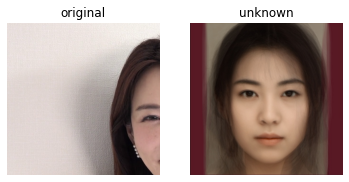

In [95]:
plot_comparison(image1, unknown_image, "unknown")

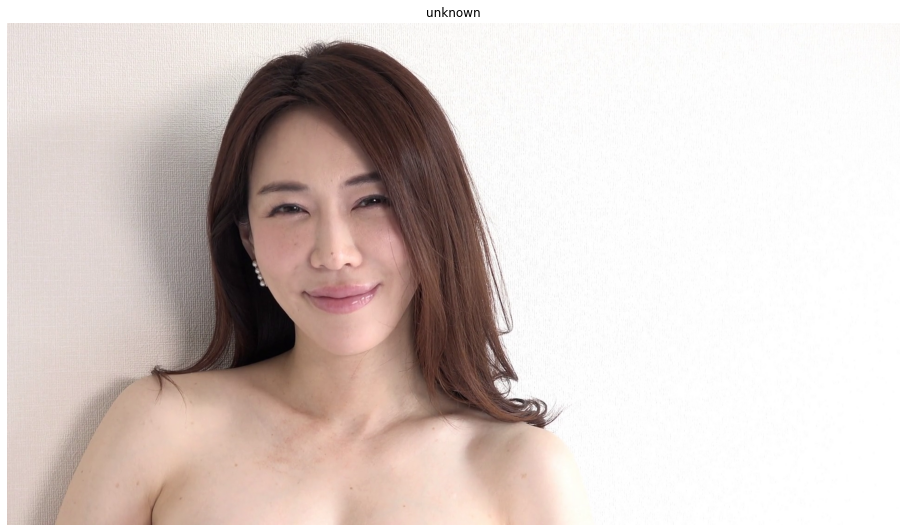

In [96]:
show_image(image1, "unknown")

In [97]:
#load the the image in the test folder as image 7
image8 = face_recognition.load_image_file('Humans_faces/1 (2763).jpg')

# Find all the faces in the image
face_locations8 = face_recognition.face_locations(image8)

#face enconding for the white old male in the train folder
#face_encoding2 = face_recognition.face_encodings(image2, known_face_locations=face_locations)[0]
#face enconding for the white old male in the test folder
face_encoding8 = face_recognition.face_encodings(image8, known_face_locations=face_locations8)[0]
# Compare the two images to see if there are similar or not
face_recognition.compare_faces(face_encoding1, face_encoding8, tolerance=0.08)

[False]

In [98]:
unknown_image22 = face_recognition.load_image_file('test/test_old_wt_m.jpeg') 
face_landmarks_list = face_recognition.face_landmarks(unknown_image22) #using image1, the image of the white female
# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=2)

The chin in this face has the following points: [(190, 619), (195, 707), (206, 794), (221, 884), (257, 968), (307, 1039), (371, 1096), (443, 1140), (533, 1146), (625, 1130), (703, 1080), (771, 1020), (822, 942), (850, 858), (855, 769), (857, 676), (856, 583)]
The left_eyebrow in this face has the following points: [(230, 570), (272, 522), (338, 507), (403, 513), (464, 534)]
The right_eyebrow in this face has the following points: [(538, 538), (599, 512), (667, 502), (731, 512), (775, 557)]
The nose_bridge in this face has the following points: [(504, 590), (505, 653), (506, 715), (505, 779)]
The nose_tip in this face has the following points: [(437, 810), (471, 824), (510, 839), (550, 822), (587, 805)]
The left_eye in this face has the following points: [(306, 601), (340, 583), (376, 583), (414, 603), (375, 607), (339, 608)]
The right_eye in this face has the following points: [(597, 599), (632, 578), (668, 578), (705, 594), (669, 601), (633, 601)]
The top_lip in this face has the foll

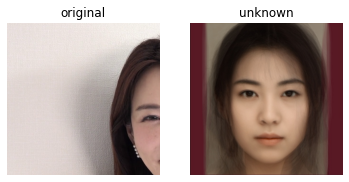

In [99]:
plot_comparison(image1, unknown_image, "unknown")

In [100]:
unknown_image = face_recognition.load_image_file('test/test_old_wt_m.jpeg')
if len(unknown_face_encodings) > 0:
    unknown_face_encodings = unknown_face_encodings
    for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
        results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding)

        name = "Unknown"

        if results == True:
            name = "Person 1"
            print(f"Found {name} in the photo!")
        else:
           print("No faces found in the image!")

No faces found in the image!


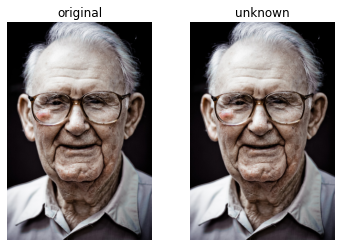

In [38]:
plot_comparison(image2, unknown_image, "unknown")